# NYSE FANG+ index 日足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

In [3]:
code = 'NYFANG'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

In [4]:
# 日足で過去 2 年分のデータを取得
df0 = ticker.history(period='5y', interval='1d')
 
# ローソク足のチャートには、そのうち過去 1 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_1y =  datetime.timedelta(days=365)
df = df0[df0.index >= dt_last - tdelta_1y]

## Moving Median

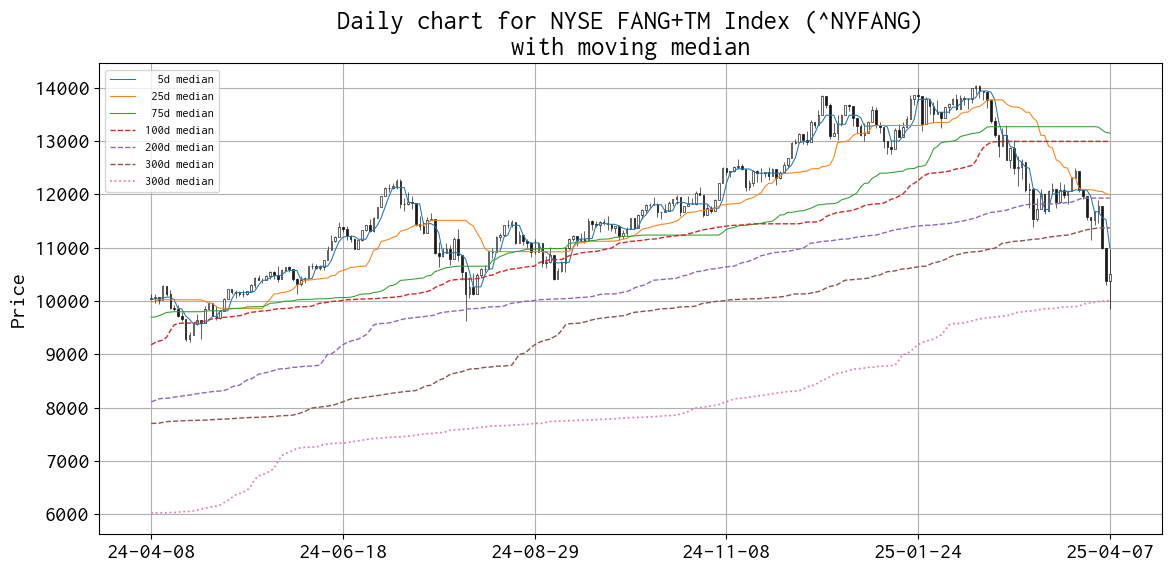

In [19]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

mm005 = df0['Close'].rolling(5).median()
mm025 = df0['Close'].rolling(25).median()
mm075 = df0['Close'].rolling(75).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()
mm300 = df0['Close'].rolling(300).median()
mm500 = df0['Close'].rolling(500).median()

apds  = [
    mpf.make_addplot(mm005[df.index], width=0.75, label='  5d median', ax=ax),
    mpf.make_addplot(mm025[df.index], width=0.75, label=' 25d median', ax=ax),
    mpf.make_addplot(mm075[df.index], width=0.75, label=' 75d median', ax=ax),
    mpf.make_addplot(mm100[df.index], linestyle='dashed', width=1, label='100d median', ax=ax),
    mpf.make_addplot(mm200[df.index], linestyle='dashed', width=1, label='200d median', ax=ax),
    mpf.make_addplot(mm300[df.index], linestyle='dashed', width=1, label='300d median', ax=ax),
    mpf.make_addplot(mm500[df.index], linestyle='dotted', width=1.25, label='300d median', ax=ax),
]   

mpf.plot(df, type='candle', style='default', datetime_format='%y-%m-%d', addplot=apds, xrotation=0, ax=ax)

ax.set_title('Daily chart for %s (%s)\nwith moving median' %(ticker.info['longName'], symbol))
ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('report_daily_chart_median_%s.png' % code)
plt.show()

In [10]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-04 00:00:00-04:00,10997.459961,10997.459961,10293.559570,10373.980469,0,0.0,0.0
2025-04-07 00:00:00-04:00,10374.000000,10977.812500,9841.608398,10514.040039,0,0.0,0.0


In [11]:
df.tail(2)['Close']

Date
2025-04-04 00:00:00-04:00    10373.980469
2025-04-07 00:00:00-04:00    10514.040039
Name: Close, dtype: float64

In [12]:
df.tail(2)['Close'].diff()

Date
2025-04-04 00:00:00-04:00          NaN
2025-04-07 00:00:00-04:00    140.05957
Name: Close, dtype: float64

In [13]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-04-07 00:00:00-04:00    140.040039
dtype: float64

In [14]:
df['Close'].rolling(9).median().tail()

Date
2025-04-01 00:00:00-04:00    11990.900391
2025-04-02 00:00:00-04:00    11965.290039
2025-04-03 00:00:00-04:00    11778.150391
2025-04-04 00:00:00-04:00    11674.129883
2025-04-07 00:00:00-04:00    11566.830078
Name: Close, dtype: float64

In [15]:
df['Close'].rolling(13).median().tail()

Date
2025-04-01 00:00:00-04:00    12055.480469
2025-04-02 00:00:00-04:00    11990.900391
2025-04-03 00:00:00-04:00    11965.290039
2025-04-04 00:00:00-04:00    11965.290039
2025-04-07 00:00:00-04:00    11778.150391
Name: Close, dtype: float64

In [16]:
df['Close'].rolling(26).median().tail()

Date
2025-04-01 00:00:00-04:00    12082.719727
2025-04-02 00:00:00-04:00    12068.339844
2025-04-03 00:00:00-04:00    12056.325195
2025-04-04 00:00:00-04:00    12032.605469
2025-04-07 00:00:00-04:00    12000.315430
Name: Close, dtype: float64

In [17]:
df['Close'].rolling(52).median().tail()

Date
2025-04-01 00:00:00-04:00    13094.449707
2025-04-02 00:00:00-04:00    13003.369629
2025-04-03 00:00:00-04:00    12886.839844
2025-04-04 00:00:00-04:00    12760.595215
2025-04-07 00:00:00-04:00    12627.370117
Name: Close, dtype: float64

## Robust Bollinger's bands

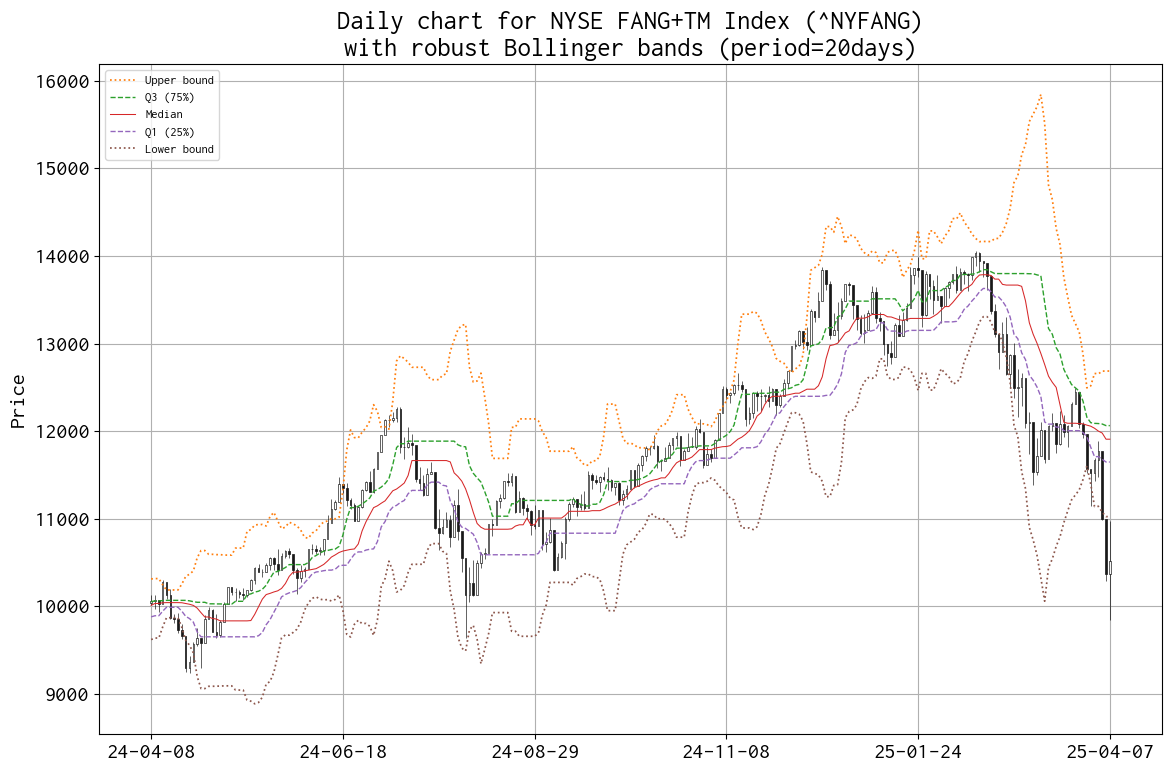

In [18]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 20
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith robust Bollinger bands (period=%ddays)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Daily chart for %s\nwith robust Bollinger bands (period=%ddays)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_daily_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム & Q-Q プロット

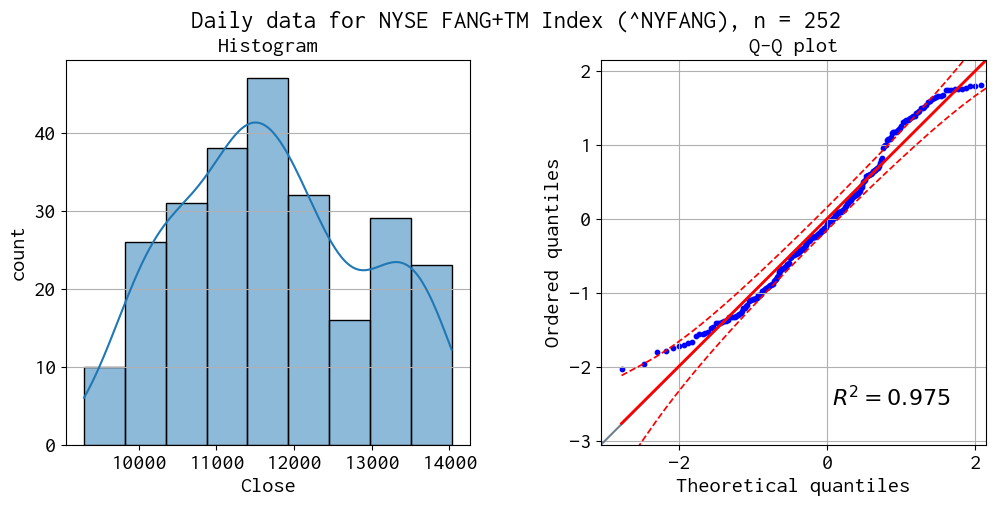

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Daily data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_daily_histogram_qqplot_%s.png' % code)
plt.show()